TESTOWY NOTEBOOK

Import Bibliotek

In [1]:
import tensorflow as tf
import numpy as np
import pathlib

In [8]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

print(tf.__version__)

2.16.1


In [37]:
# Definicja zmiennych
batch_size = 100
img_height = 256
img_width = 256

# train_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\\train")
# test_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\\test")

# train_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\small_ds")
# test_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\small_ds")

train_data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\Data")



In [38]:
# Ładowanie datasetu do nauki
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
# )
  batch_size=batch_size)

Found 2971 files belonging to 2 classes.
Using 2377 files for training.


In [39]:
# Ładowanie datasetu do testów
test_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# )

Found 2971 files belonging to 2 classes.
Using 594 files for validation.


In [40]:
# Pobranie listy klas datasetu
class_names = train_ds.class_names
print(class_names)

['AI', 'Real']


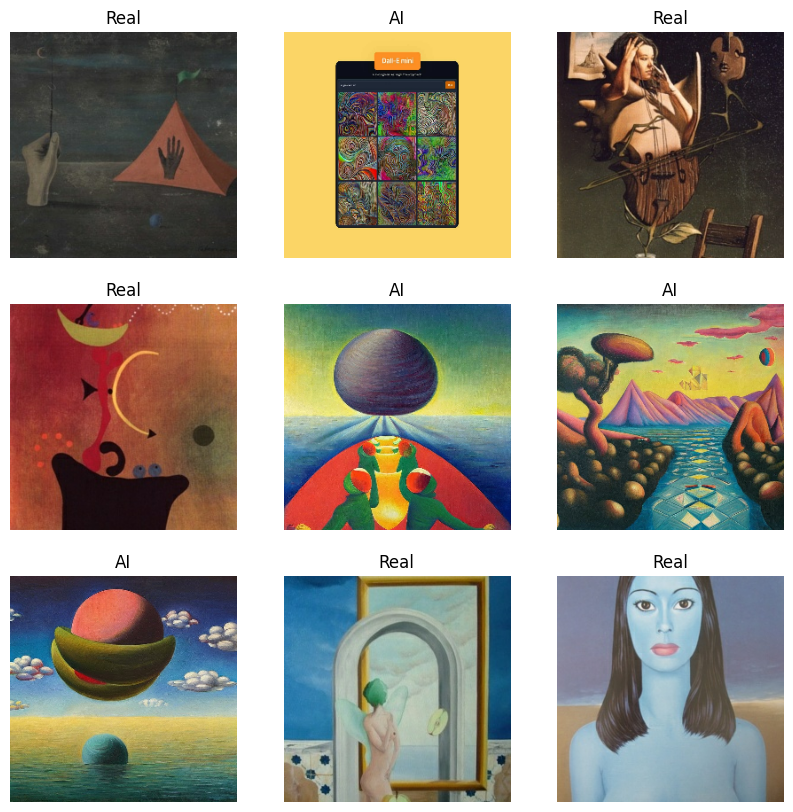

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [42]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [43]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(100, 256, 256, 3)
(100,)


In [45]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = normalized_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [47]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [49]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=5,
  verbose=1
)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5107 - loss: 0.6939 - val_accuracy: 0.4747 - val_loss: 0.7350
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5310 - loss: 0.6927 - val_accuracy: 0.4731 - val_loss: 0.7259
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5310 - loss: 0.6924 - val_accuracy: 0.4731 - val_loss: 0.7244
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5310 - loss: 0.6922 - val_accuracy: 0.4731 - val_loss: 0.7237
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5310 - loss: 0.6920 - val_accuracy: 0.4731 - val_loss: 0.7231


In [50]:
test_loss, test_accuracy = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.4748 - loss: 0.7191


In [31]:
model.save('my_model.keras')

In [51]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256, 256, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256, 256, 32)   │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,295,272 (180.42 MB)

 Trainable params: 15,765,090 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,530,182 (120.28 MB)